# ML4NLP1
## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is o make you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- Numpy: [Documentation](https://numpy.org/doc/)

**Importing files to Google Colab:** If you have never used Colab or never uploaded a file to Colab, quickly skim over an introduction: [Introduction on medium](https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97).

We're using the second method mentioned in the blogpost: (1) upload the four files `x_train.txt` and `y_train.txt`, `x_test.txt` and `y_test.txt` to a directory in Google Drive and (2) adjust the paths in the second cell to point to your uploaded files.

Then execute the first cell to give Colab permission to access the two files.

In [1]:
import pandas as pd
import numpy as np
import csv
import re
import string
from collections import defaultdict

In [2]:
# download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:01<00:00, 46.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:00<00:00, 187MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 18.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 19.0MB/s]


In [3]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [4]:
# combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})

In [5]:
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [6]:
# get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'

In [11]:
# T: Have a quick peek at the training data, looking at a couple of texts from different languages. Do you notice anything that might be challenging for the classification?
# Problem; languages with non latin characters such as arabic and amh;


td = train_df.groupby('label')
rand_idx = 5
for label, group in td:
  print(label)
  print(group['text'].iloc[:2].values)

  if rand_idx == 0:
    break
  rand_idx = rand_idx - 1



ace
["La'én dairah atawa wilayah, meula'én cit lugat bahsa Acèh. Lagèë lugat bahsa Acèh di Acèh Rayek meubida ngön lugat nyang na di Pidië atawa di Acèh Jeumpa, meunankeuh miseujih. Teuma bahsa Acèh nyang standart nakeuh bahsa nyang na geu marit atawa geu meututô lé masyarakat di dairah Acèh Utara. Meubida bahsa teuntè jeuët keu bida meuphôm. Miseuë tutô 'Barôh', lam ladôm dairah Acèh Rayeuk areuti jih miyeup (bahsa Èndônèsiya; bawah), tapi meunyoë di dairah Pidië 'Barôh' meukuseud jih lawan tunong (bahsa Èndônèsiya; selatan). Meunan umpama."
 "Meudeuhab Hanafi geupeudöng lé Imeum Abu Hanifah Nu'man bin Tsabit, lahé thôn 80 H, meuninggai thôn 150 H di Baghdad, Irak. Gopnyan geumeurunoe di Kufah, di sinoekeuh gopnyan mulai geususôn meudeuhab. Murid-murid Abu Hanifah ramè, ureuëng nyan antara la'én, Abu Yusuf, Muhammad bin Hasan ngön Zufar. Mazeuhab Hanafi nyoe le meukeumang di Baghdad, Parsi, Bukhara, Meusé, Syam, meunan chit löm bak teumpat la'én."]
afr
["Die geelblom (Cineraria saxifr

In [15]:
# T: How many instances per label are there in the training and test set? Do you think this is a balanced dataset? Do you think the train/test split is appropriate? If not, please rearrange the data in a more appropriate way.
# 1000 samples per language therefore balanced
# Train Test split not appropriate since we want an 80:20 split
td = train_df.groupby('label')
sizes = {}
for label, group in td:
  try:
    sizes[len(group)].append(label)
  except Exception as e:
    print(e)
    sizes[len(group)] = [label]



print("Train Sample Sizes: ",sizes.keys())


td = test_df.groupby('label')
sizes = {}
for label, group in td:
  try:
    sizes[len(group)].append(label)
  except Exception as e:
    print(e)
    sizes[len(group)] = [label]



print("Test Sample Sizes: ",sizes.keys())

500
Train Sample Sizes:  dict_keys([500])
500
Test Sample Sizes:  dict_keys([500])


In [16]:
# Merge both dfs and then split into 80:20
all_df = pd.concat([train_df, test_df], ignore_index=True)

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(all_df['text'], all_df['label'], test_size = 0.2, random_state = 42, stratify = all_df['label'])


In [51]:
# T: Get a subset of the train/test data that includes English, German, Dutch, Danish, Swedish and Norwegian, plus 20 additional languages of your choice (the labels can be found in the file labels.csv)

l = train_y.unique()
l.sort()
l = l.tolist()

# pre selected langauges
languages = ['eng', 'deu', 'nld', 'dan', 'swe', 'nob'] # add japanese here

# get 20 other langauges randomly
num_languages = 19
l = [lang for lang in l if lang not in languages]
np.random.seed(42)
rand_idx = np.random.choice(len(l), num_languages)

for i in range(num_languages):
  idx = rand_idx[i]
  languages.append(l[idx])

# now use this list to get corresponding training data
new_df = all_df[all_df['label'].isin(languages)]







train_x, test_x, train_y, test_y= train_test_split(new_df.drop(columns=['label']), new_df['label'], test_size = 0.2, random_state = 42, stratify = new_df['label'])



In [ ]:
# # T: With the following code, we wanted to encode the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
# from sklearn.preprocessing import LabelEncoder
# le_fitted = LabelEncoder().fit(train_df['label'])
# y_train_dev, y_test = le_fitted.fit(train_df['label']), le_fitted.fit(test_df['label'])

In [66]:
from sklearn.preprocessing import LabelEncoder
le_fitted = LabelEncoder().fit(train_y)
y_train_dev = le_fitted.transform(train_y)
y_test = le_fitted.transform(test_y)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

##### Adding linguistic features
class AvgWordLengthExtractor(BaseEstimator, TransformerMixin):
    def compute_avg_word_length(self, text):
        return len(text.split(' '))

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return np.array([self.compute_avg_word_length(text) for text in X]).reshape(-1, 1)

class SentenceLengthExtractor(BaseEstimator, TransformerMixin):
    def compute_sentence_length(self, text):
        list_of_words = text.split(' ')
        total = sum(len(word) for word in list_of_words)
        return total/len(list_of_words)

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return np.array([self.compute_sentence_length(text) for text in X]).reshape(-1, 1)



preprocessor = ColumnTransformer(
    transformers=[
        ('text', Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer())
        ]), 'text'),
        ('avg_word_len', AvgWordLengthExtractor(), 'text'),
        ('avg_sent_len', SentenceLengthExtractor(), 'text')
    ]
)

# Define the full pipeline
text_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression())
])

In [38]:




# text_clf = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
#     ('clf', LogisticRegression())
# ])

In [69]:
train_x

,text
177554,1923 Na štíte bola vztýčená štátna kovová vlaj...
163596,Der Asteroid wurde nach dem französischen Schr...
209847,"कथाकर, समीक्षक, अनुवादक, ग्रंथ सम्पादक । साहित..."
30319,Canna tuerckheimii (лат. Canna tuerckheimii) —...
177345,सचिन रमेश तेन्दुलकर (/ˌsətʃɪn tɛnˈduːlkər/; जन...
...,...
84839,영어권 국가에서 신부의 입장 시에 연주되는 가장 대중적인 결혼 행진곡 중 하나(흔히...
63591,"Wertungsregeln bestimmen, für welche Karten es..."
206680,El haham Marc D. Angel (nasido en el anyo 1945...
51538,Öні Пання грездыс пырӧ Ленинск посадмуӧ. Посад...


In [68]:
test_x

,text
55391,"Snijders, Paul, 'Ries, Leopold Abraham', in: R..."
83381,I 1495 udgjorde indtægterne fra tolden på hved...
188018,Наименования одежды в языке коми-пермяков. Аре...
98568,Øresund er et sjøområde beliggende mellom Sjæl...
210240,Klapsko pjevanje se u vokalno-tehničkom smislu...
...,...
127437,"이름이란 단어는 ""이르다""라는 동사의 명사형으로서 중세 국어에서는 “일홈” 또는 “..."
197309,"Indemas, Meksiko se topa entre las sus koordin..."
171131,"En 1914, djusto antes de la primera gerra mond..."
196670,"Der Verlag am Galgenberg, auch Kurzform Galgen..."


In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(text_clf, train_x, train_y, scoring='accuracy', cv=2)
print(scores)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.92923077 0.88442308]


In [73]:
from sklearn.model_selection import GridSearchCV

text_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'preprocessor__text__vect__ngram_range': [(1, 1), (1, 2)],
    'clf__penalty': ['l2', 'l1'],
    'clf__solver': ['lbfgs', 'newton-cg']
}

# Create GridSearchCV object
gs_svc = GridSearchCV(text_clf, param_grid, cv=2, verbose=1)
gs_svc.fit(train_x, train_y)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('text',
                                                                         Pipeline(steps=[('vect',
                                                                                          CountVectorizer()),
                                                                                         ('tfidf',
                                                                                          TfidfTransformer())]),
                                                                         'text'),
                                                                        ('avg_word_len',
                                                                         AvgWordLengthExtractor(),
                                                                         'text'),
                                                                        ('avg_sent_len',
                                                                         SentenceLengthExtractor(),
                                                                         'text')])),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__penalty': ['l2', 'l1'],
                         'clf__solver': ['lbfgs', 'newton-cg'],
                         'preprocessor__text__vect__ngram_range': [(1, 1),
                                                                   (1, 2)]},
             verbose=1)

In [74]:
best_params = gs_svc.best_params_

print("Best hyperparameters:")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")


best_model = gs_svc.best_estimator_

Best hyperparameters:
clf__penalty: l2
clf__solver: newton-cg
preprocessor__text__vect__ngram_range: (1, 1)


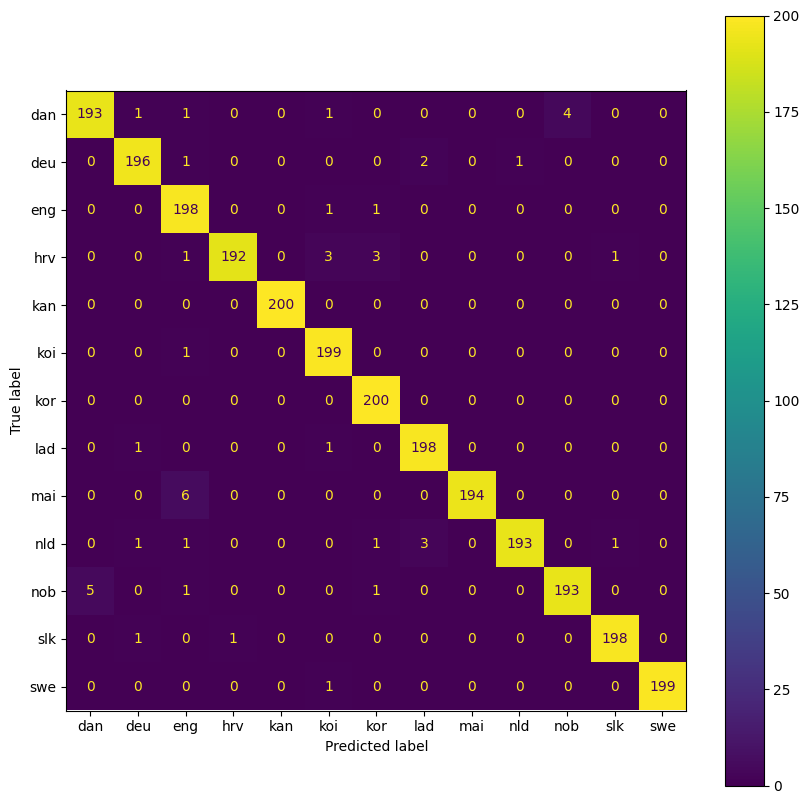

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

y_pred = best_model.predict(test_x)
cm = confusion_matrix(test_y, y_pred)


class_names = le_fitted.classes_

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(ax=ax)

plt.show()

In [76]:
report = classification_report(test_y, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dan       0.97      0.96      0.97       200
         deu       0.98      0.98      0.98       200
         eng       0.94      0.99      0.97       200
         hrv       0.99      0.96      0.98       200
         kan       1.00      1.00      1.00       200
         koi       0.97      0.99      0.98       200
         kor       0.97      1.00      0.99       200
         lad       0.98      0.99      0.98       200
         mai       1.00      0.97      0.98       200
         nld       0.99      0.96      0.98       200
         nob       0.98      0.96      0.97       200
         slk       0.99      0.99      0.99       200
         swe       1.00      0.99      1.00       200

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



In [77]:
!pip install eli5
import eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=5cb952b1da3355ebcceb7c3ec11529936310f653b4a149ce0dfc11db643a329a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [80]:
# First, get the feature names from the correct part of your pipeline
feature_names = list(best_model.named_steps['preprocessor'].named_transformers_['text'].named_steps['vect'].get_feature_names_out())

# Append names of the additional features
feature_names.extend(['avg_word_len', 'avg_sent_len'])
# Then, show the feature importances
eli5.show_weights(best_model.named_steps['clf'], feature_names=feature_names, top=10, target_names=['eng', 'swe', 'nob'])

In [81]:
languages = ['kan', 'mai']

# now use this list to get corresponding training data
new_df = all_df[all_df['label'].isin(languages)]
train_x, test_x, train_y, test_y= train_test_split(new_df['text'], new_df['label'], test_size = 0.2, random_state = 42, stratify = new_df['label'])



In [82]:
# Given the best hyperparams

char_limits = [None, 500, 100, 10]  # None indicates use of all characters

for i in range(len(char_limits)):

  char_limit = char_limits[i]

  # Re-fit the model with reduced data
  text_clf = Pipeline([
      ('preprocessor', preprocessor),
      ('clf', LogisticRegression())
  ])
  text_clf.fit(train_x, train_y)

  y_pred = text_clf.predict(test_x)
  accuracy = (y_pred == test_y).mean()
  print(f"Characters: {char_limit} Accuraccy: {accuracy}")


Characters: None Accuraccy: 0.9975
Characters: 500 Accuraccy: 0.9975
Characters: 100 Accuraccy: 0.9975
Characters: 10 Accuraccy: 0.9975
